# Parkisons Telemonitoring

# Importing Libraries

In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# to load the data to pandas dataframe from CSV file
dff = pd.read_csv('Group 19_ Parkinsons Telemonitoring_Dataset.csv')

In [3]:
# print first five rows of the data
dff.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
# print last five rows of the data
dff.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


**Observations:** "motor_UPDRS & total_UPDRS" columns is our target feature.

# Data Exploration

In [5]:
# check the number of rows and columns in our dataset
print(dff.shape)

(5875, 22)


In [6]:
# Getting more information of our dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

**Observations:** "subject#" column is an identifier to a record we can remove this field.

In [7]:
dff.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

**Observations:** There are no null values in our dataset

In [8]:
# Getting some statistical information of our data
dff.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000034,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


# Data Preprocessing

In [9]:
dff = dff.drop(['subject#'], axis=1)

In [10]:
array = dff.values
X = np.hstack((array[:,0:4],array[:,6:]))
Y = array[:,4:6]
print(X.shape,Y.shape)

(5875, 19) (5875, 2)


# Splitting data into train and test data

In [11]:
# to load the dataset
# summarizing the dataset
from sklearn.model_selection import train_test_split

# split the data into train sets
# split the data into the train sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 19) (4112, 2)
Test (1763, 19) (1763, 2)


In [12]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
# feature selection
def select_features(X_train, y_train, X_test):
    features_selected = SelectKBest(score_func=f_regression, k='all')
    features_selected.fit(X_train, y_train)
    X_train_fs = features_selected.transform(X_train)
    X_test_fs = features_selected.transform(X_test)
    return X_train_fs, X_test_fs, features_selected

#we want to predict two random variables y,this means we should look at the correlations with each of them. 
#So initially we can calculte f-scores of the first UPDRS motor variable


X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,0], X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 420.401660
Feature 1: 44.660826
Feature 2: 20.860318
Feature 3: 35435.818389
Feature 4: 19.072095
Feature 5: 16.588842
Feature 6: 15.512242
Feature 7: 16.602723
Feature 8: 37.284312
Feature 9: 40.993112
Feature 10: 29.392137
Feature 11: 30.425985
Feature 12: 62.226065
Feature 13: 29.391676
Feature 14: 16.294904
Feature 15: 113.889818
Feature 16: 100.870182
Feature 17: 59.913895
Feature 18: 101.257652


In [13]:
# second selection for the random variable total UPDRS.

X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,1], X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 4.075685
Feature 1: 10.070326
Feature 2: 2.693167
Feature 3: 27.646906
Feature 4: 12198.145713
Feature 5: 133600.484478
Feature 6: 63664.075919
Feature 7: 133637.371324
Feature 8: 4138.160439
Feature 9: 4299.885815
Feature 10: 3265.461787
Feature 11: 3763.768229
Feature 12: 2592.129091
Feature 13: 3265.466827
Feature 14: 8769.433584
Feature 15: 3384.560664
Feature 16: 891.928809
Feature 17: 209.350293
Feature 18: 4386.763176


subsequently mutual information can be used similarly to the f-score, we can conclude that the features with the largest mutual information are the best features for k. Mutual data is calculated between two variables and measures the reduction of uncertainty for one random variable, given the value of another random variable.

In [14]:
# example for numerical input data
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    features_selected = SelectKBest(score_func=mutual_info_regression, k='all')
    features_selected.fit(X_train, y_train)
    X_train_fs = features_selected.transform(X_train)
    X_test_fs = features_selected.transform(X_test)
    return X_train_fs, X_test_fs, features_selected
 

X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,0], X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 2.651258
Feature 1: 0.522787
Feature 2: 5.568502
Feature 3: 5.669833
Feature 4: 0.107146
Feature 5: 0.070122
Feature 6: 0.101212
Feature 7: 0.072345
Feature 8: 0.088869
Feature 9: 0.078550
Feature 10: 0.089753
Feature 11: 0.093994
Feature 12: 0.111116
Feature 13: 0.089371
Feature 14: 0.076881
Feature 15: 0.110864
Feature 16: 0.063474
Feature 17: 0.191771
Feature 18: 0.071150


In [15]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train[:,1], X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.158440
Feature 1: 0.014938
Feature 2: 0.029767
Feature 3: 0.092836
Feature 4: 1.069283
Feature 5: 1.422113
Feature 6: 1.479619
Feature 7: 1.424216
Feature 8: 0.341047
Feature 9: 0.369985
Feature 10: 0.300545
Feature 11: 0.328922
Feature 12: 0.339293
Feature 13: 0.301098
Feature 14: 0.620162
Feature 15: 0.513354
Feature 16: 0.223349
Feature 17: 0.137175
Feature 18: 0.699928


In [16]:
X_train[1]

array([5.5000e+01, 0.0000e+00, 1.1250e+02, 2.1372e+01, 3.9700e-05,
       3.1200e-03, 2.5000e-03, 9.3600e-03, 3.8560e-02, 3.4300e-01,
       2.1350e-02, 2.2370e-02, 2.8020e-02, 6.4040e-02, 3.0023e-02,
       2.1064e+01, 4.7444e-01, 5.5755e-01, 1.9252e-01])

# Data Visualization

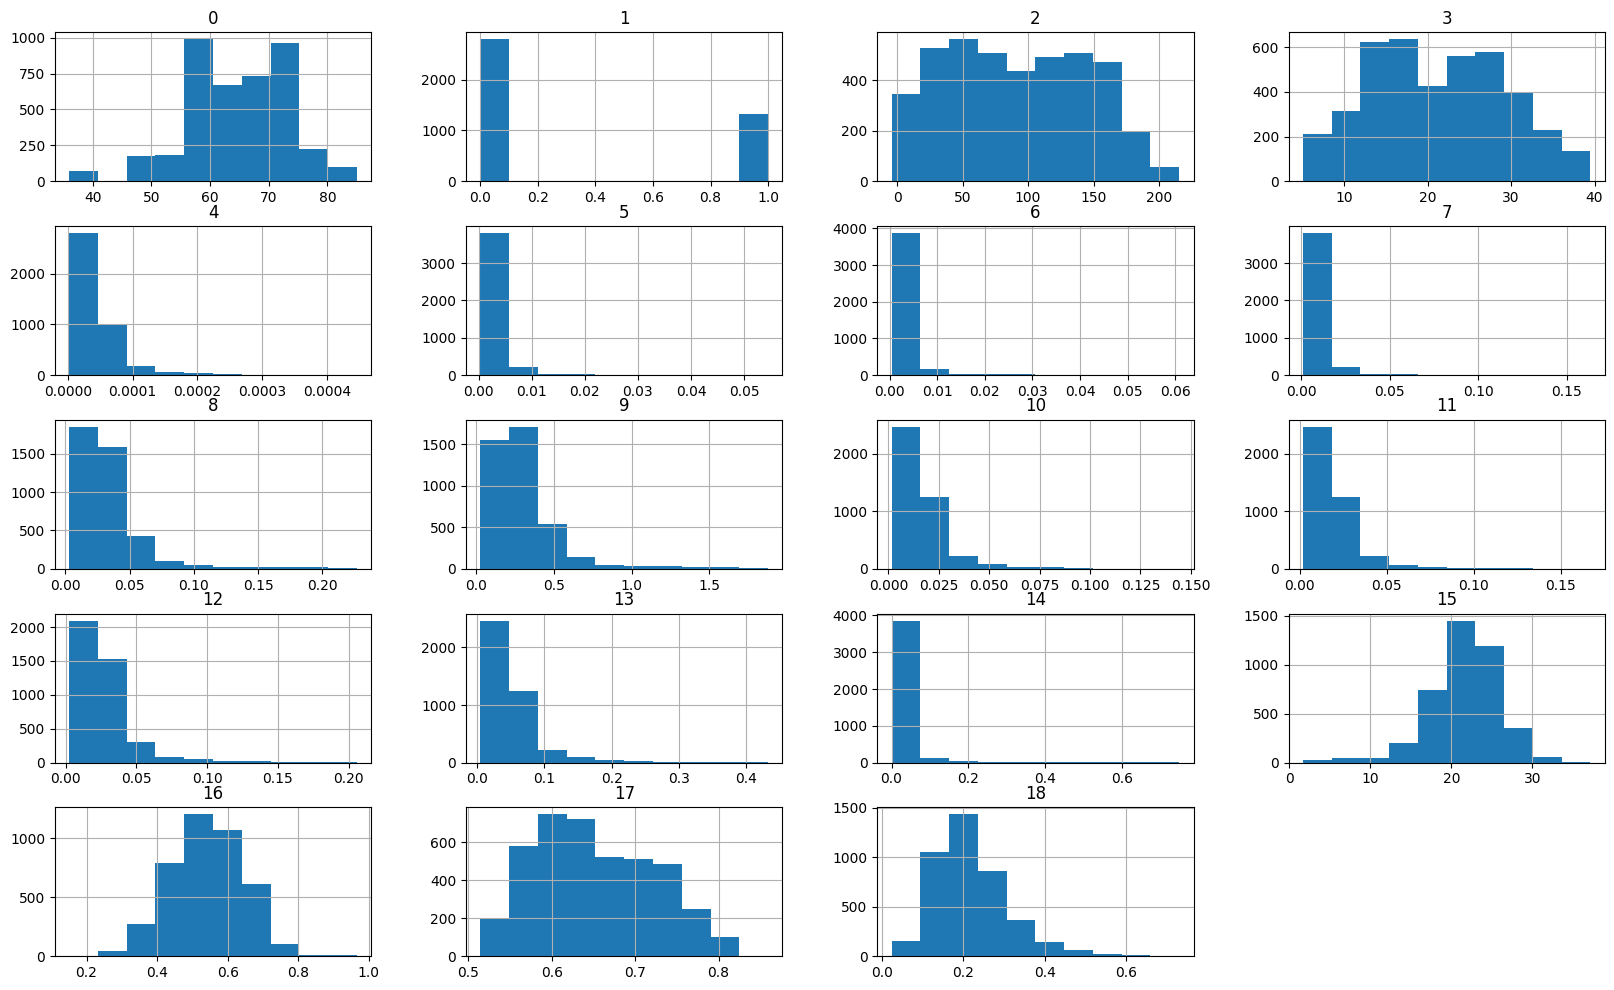

In [17]:
pd.DataFrame(X_train).hist(figsize=(20,12))
plt.show()

# Correlation Heatmap

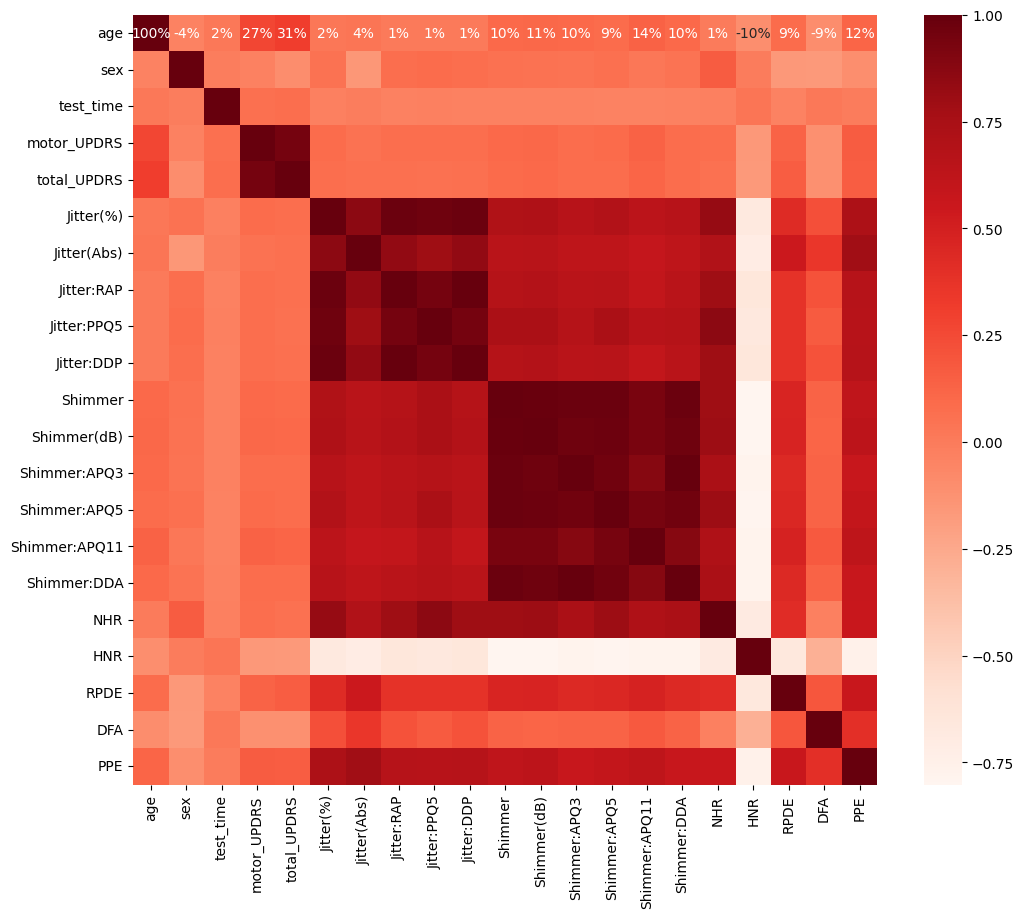

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
#Using Pearson Correlation
pyplot.figure(figsize=(12,10))
correlation_heatmap = dff.corr()
sns.heatmap(correlation_heatmap, annot=True, cmap=plt.cm.Reds,fmt='.0%')
pyplot.show()

In [19]:
#Correlation
#output variable
cor_target = abs(correlation_heatmap['motor_UPDRS'])
important_features = cor_target[cor_target>0.1]
important_features

age              0.273665
motor_UPDRS      1.000000
total_UPDRS      0.947231
Shimmer          0.102349
Shimmer(dB)      0.110076
Shimmer:APQ11    0.136560
HNR              0.157029
RPDE             0.128607
DFA              0.116242
PPE              0.162433
Name: motor_UPDRS, dtype: float64

In [20]:
cor_target = abs(correlation_heatmap['total_UPDRS'])
important_features = cor_target[cor_target>0.1]
important_features

age              0.310290
motor_UPDRS      0.947231
total_UPDRS      1.000000
Shimmer:APQ11    0.120838
HNR              0.162117
RPDE             0.156897
DFA              0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

Features having a p-value greater than 0.05 will be eliminated. We can start a loop and keep going through this until we get the greatest model we can.

In [21]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
X_1 = sm.add_constant(X_train)
# Fitting sm.OLS model
ols_model = sm.OLS(y_train[:,0],X_1).fit()
ols_model.pvalues

array([1.33427462e-02, 9.60189236e-27, 4.50415013e-23, 2.53156244e-02,
       0.00000000e+00, 3.06566154e-04, 7.01474437e-01, 9.12408845e-02,
       6.99684812e-01, 5.96080528e-01, 5.07179786e-02, 5.47244062e-01,
       3.77042969e-07, 2.62662408e-07, 5.47059245e-01, 1.16590903e-01,
       6.48034398e-06, 3.21950710e-04, 5.77254793e-03, 1.11283488e-03])

In [22]:
cols = list(pd.DataFrame(X_train).columns)
pmax = 1

# Backward Elimination

while (len(cols)>0):
    p= []
    X_train_cols = pd.DataFrame(X_train)[cols]
    X_train_cols = sm.add_constant(X_train_cols)
    ols_model = sm.OLS(pd.DataFrame(y_train[:,0]),X_train_cols).fit()
    p = pd.Series(ols_model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[0, 1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18]


Applying regularization with a cutoff for the index coefficient. Specifically, we will use Lasso regularization. If a feature is pointless to our model, a factor of 0 is applied to the lasso. As a result, every feature in our model with a coefficient of 0 is removed.

In [23]:
lasso_regularization = LassoCV()
lasso_regularization.fit(X_train, y_train[:,0])
print("Best alpha using built-in LassoCV: %f" % lasso_regularization.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_regularization.score(X_train,y_train[:,0]))
coef = pd.Series(lasso_regularization.coef_, index = pd.DataFrame(X_train).columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.081302
Best score using built-in LassoCV: 0.902880
Lasso picked 5 variables and eliminated the other 14 variables


**Feature selection**
After completing all of the earlier tasks, we can now select a subset of the most crucial features to work with. To do this, we will only retain the traits that we discovered during the prior backward elimination.

In [24]:
X_train = pd.DataFrame(X_train)
X_train = X_train[[0, 1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18]]
X_train = X_train.values

X_test = pd.DataFrame(X_test)
X_test = X_test[[0, 1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18]]
X_test = X_test.values

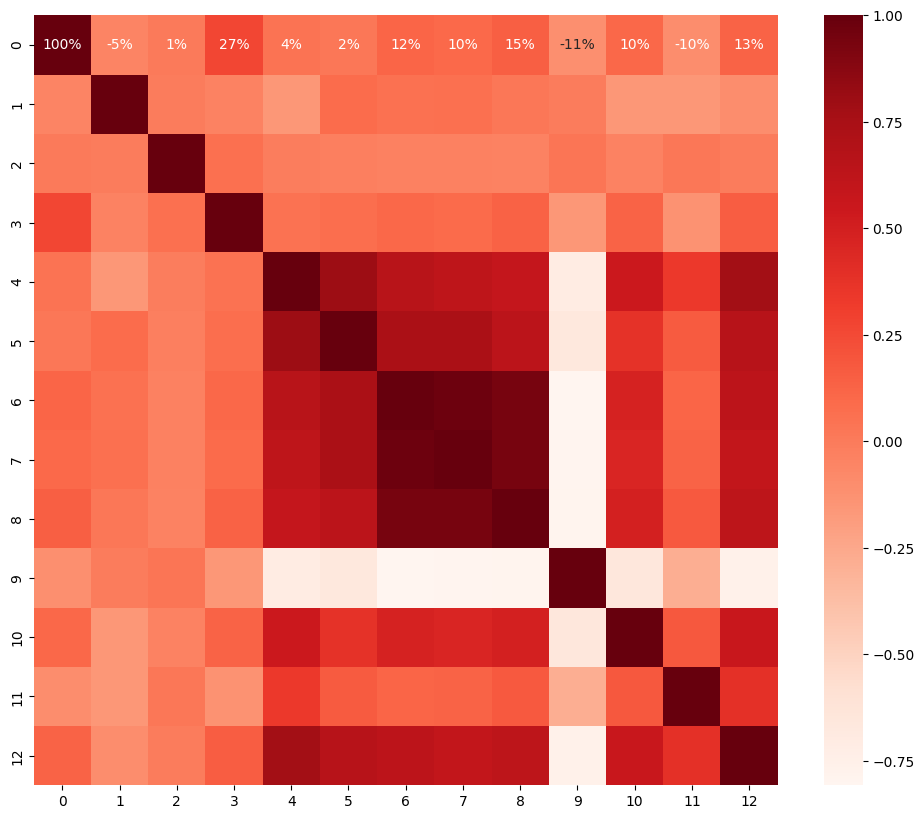

In [25]:
plt.figure(figsize=(12,10))
# Use Pearson Correlation

correlation_heatmap = pd.DataFrame(X_train).corr()
sns.heatmap(correlation_heatmap, annot=True, cmap=plt.cm.Reds,fmt='.0%')
plt.show()

# Model training

In this part we will train some regressors so that they can learn from our data and make predictions. The first thing we do is load all the sklearn libraries that we will need later.In order to execute the grid search with cross validation later on, we additionally define a scaler and a PCA class. Additionally, we have developed the compute_metrics function, which computes the metrics R2 and MSE for the training and control sets and generates predictions for us given a classifier that we have fitted to some data.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import time


# initialize transformers without hyper-parameters
scaler = StandardScaler()
pca = PCA()

n_components = [3, 5, 7, 8, 10, 12, 13]
def compute_metrics(trained_model, x_train, y_train, x_test, y_test):
    train_predict = trained_model.predict(x_train)
    test_predict = trained_model.predict(x_test)
    
    # Accuracy calculation
    train_accuracy = r2_score(y_train, train_predict)
    test_accuracy = r2_score(y_test, test_predict)

    # Calculate of Mean Square Error
    train_MSE = mean_squared_error(y_train, train_predict)
    test_MSE = mean_squared_error(y_test, test_predict)

    print('Correctness in the training data set: {:.2%}'.format( train_accuracy))
    print('Correctness in the testing data set: {:.2%}\n'.format(test_accuracy))
    print('Mean Square Error in training samples: {:.4f}'.format(train_MSE))
    print('Mean Square Error in testing samples: {:.4f}'.format(test_MSE))
    return train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE

# RandomForestRegression

Random Forests are algorithms that are very similar to trees. They are actually combinations of several trees together and essentially have similar hyperparameters, which is why we work similarly to trees.
Random Forest as with trees the performance is already very high without tuning, so after grid search we see very little increase in performance.

In [27]:
random_forest_model = MultiOutputRegressor(RandomForestRegressor(random_state=0))
random_forest_model.fit(X_train, y_train)
compute_metrics(random_forest_model, X_train, y_train, X_test, y_test)
print("")

Correctness in the training data set: 99.74%
Correctness in the testing data set: 98.64%

Mean Square Error in training samples: 0.0145
Mean Square Error in testing samples: 0.0976



# K-Nearest Neighbor(Knn)

For kNN we tune two hyperparameters that have to do with the algorithm that measures distances, as well as the number of nearest neighbors we use to learn our data. Again PCA gets in the way the most, so we've removed it from now on. However, we see that the performance of the algorithm is greatly improved.

In [28]:
Knn_Model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=3))
Knn_Model.fit(X_train, y_train)
compute_metrics(Knn_Model, X_train, y_train, X_test, y_test)
print("")

Correctness in the training data set: 89.71%
Correctness in the testing data set: 79.10%

Mean Square Error in training samples: 0.5586
Mean Square Error in testing samples: 1.7661



# Comparsion of two models

In [29]:
data = {"Model name": ["Random Forest Regression","kNN"], "Correctness": ["98.64%","79.10%"], "MSE": ["0.0976","1.7661"]}
Comparison = pd.DataFrame(data)
Comparison

,Model name,Correctness,MSE
0,Random Forest Regression,98.64%,0.0976
1,kNN,79.10%,1.7661


# Prediction System - Knn

In [36]:
hphi = [7.5000e+01,0.0000e+00,1.1835e+02,2.9317e+01,7.7000e-05,4.6800e-03,
 2.8800e-01, 2.0760e-02, 3.2460e-02, 1.9865e+01, 5.2916e-01, 7.8789e-01,
 3.3203e-01]
#4241

hpli = [5.6000e+01 ,1.0000e+00, 1.4773e+02, 3.6138e+01, 1.4000e-05, 1.4900e-03,
 3.3100e-01, 2.4870e-02, 2.6650e-02, 2.3273e+01, 4.0970e-01 ,6.1873e-01,
 9.2022e-02]
#5007

lphi= [5.5000e+01, 0.0000e+00, 1.5170e+02, 1.8000e+01, 1.0406e-04, 5.8500e-03,
 3.7100e-01, 2.5180e-02, 3.1930e-02, 1.8797e+01, 6.0522e-01, 7.6093e-01,
 4.6136e-01]
#2625

lpli = [7.4000e+01, 0.0000e+00, 2.3697e+01, 1.1803e+01, 2.5100e-05, 1.6600e-03,
 3.2500e-01, 2.4270e-02, 3.1650e-02, 2.1204e+01, 6.8600e-01, 6.1909e-01,
 1.3660e-01]
#442


# print(neigh.predict(array1))
def predict_knn(array):
    np_array = np.asarray(array)
    array_reshape = np_array.reshape(1,-1)
    knn_prediction = Knn_Model.predict(array_reshape)
    return knn_prediction

in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))
prediction = predict_knn(in_data)
motor_avg = np.mean(y_test, axis=0)[0]
total_avg = np.mean(y_test, axis=0)[1]
motor_updrs = prediction[0][0]
total_updrs = prediction[0][1]
# [29.0183058 0.00612984118]
if(motor_updrs > motor_avg ):
    if(total_updrs > total_avg):
        print(" The Person has HIGH chance of parkinson disease and its effect on his daily life is HIGH")
    else:
        print(" The Person has HIGH chance of parkinson disease and its effect on his daily life is LOW")
else:
    if(total_updrs > total_avg):
        print(" The Person has LOW chance of parkinson disease and its early effect on his daily life is HIGH")
    else:
        print(" The Person has LOW chance of parkinson disease and its early effect effect on his daily life is LOW")


7.5000e+01,0.0000e+00,1.1835e+02,2.9317e+01,7.7000e-05,4.6800e-03,  2.8800e-01, 2.0760e-02, 3.2460e-02, 1.9865e+01, 5.2916e-01, 7.8789e-01,  3.3203e-01
 The Person has HIGH chance of parkinson disease and its effect on his daily life is HIGH


# Prediction System -RandomForestRegression

In [34]:
hphi = [7.5000e+01,0.0000e+00,1.1835e+02,2.9317e+01,7.7000e-05,4.6800e-03,
 2.8800e-01, 2.0760e-02, 3.2460e-02, 1.9865e+01, 5.2916e-01, 7.8789e-01,
 3.3203e-01]
#4241

hpli = [5.6000e+01 ,1.0000e+00, 1.4773e+02, 3.6138e+01, 1.4000e-05, 1.4900e-03,
 3.3100e-01, 2.4870e-02, 2.6650e-02, 2.3273e+01, 4.0970e-01 ,6.1873e-01,
 9.2022e-02]
#5007

lphi= [5.5000e+01, 0.0000e+00, 1.5170e+02, 1.8000e+01, 1.0406e-04, 5.8500e-03,
 3.7100e-01, 2.5180e-02, 3.1930e-02, 1.8797e+01, 6.0522e-01, 7.6093e-01,
 4.6136e-01]
#2625

lpli = [7.4000e+01, 0.0000e+00, 2.3697e+01, 1.1803e+01, 2.5100e-05, 1.6600e-03,
 3.2500e-01, 2.4270e-02, 3.1650e-02, 2.1204e+01, 6.8600e-01, 6.1909e-01,
 1.3660e-01]
#442


# print(neigh.predict(array1))
def predict_random_forest(array):
    np_array = np.asarray(array)
    array_reshape = np_array.reshape(1,-1)
    random_forest_prediction = random_forest_model.predict(array_reshape)
    return random_forest_prediction

in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))
#prediction = predict_knn(in_data)
prediction = predict_random_forest(in_data)
motor_avg = np.mean(y_test, axis=0)[0]
total_avg = np.mean(y_test, axis=0)[1]
motor_updrs = prediction[0][0]
total_updrs = prediction[0][1]
if(motor_updrs > motor_avg ):
    if(total_updrs > total_avg):
        print(" The Person has HIGH chance of parkinson disease and its effect on his daily life is HIGH")
    else:
        print(" The Person has HIGH chance of parkinson disease and its effect on his daily life is LOW")
else:
    if(total_updrs > total_avg):
        print(" The Person has LOW chance of parkinson disease and its effect on his daily life is HIGH")
    else:
        print(" The Person has LOW chance of parkinson disease and its effect on his daily life is LOW")


7.4000e+01, 0.0000e+00, 2.3697e+01, 1.1803e+01, 2.5100e-05, 1.6600e-03,  3.2500e-01, 2.4270e-02, 3.1650e-02, 2.1204e+01, 6.8600e-01, 6.1909e-01,  1.3660e-01
 The Person has LOW chance of parkinson disease and its effect on his daily life is LOW
